In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [39]:
df=pd.read_csv("dataset.csv")

In [40]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [41]:
df.shape

(200, 5)

In [42]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [43]:
df.describe(include="object")

,Gender
count,200
unique,2
top,Female
freq,112


In [44]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [45]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<ipython-input-46-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

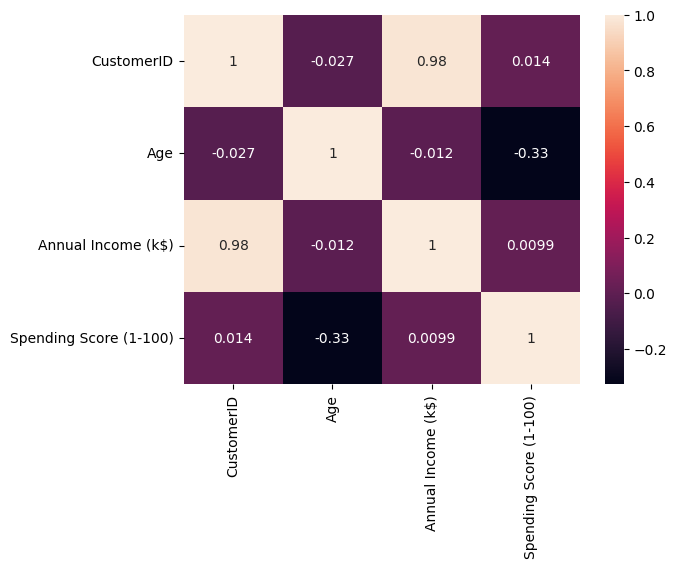

In [46]:
sns.heatmap(df.corr(),annot=True)

<Axes: ylabel='Density'>

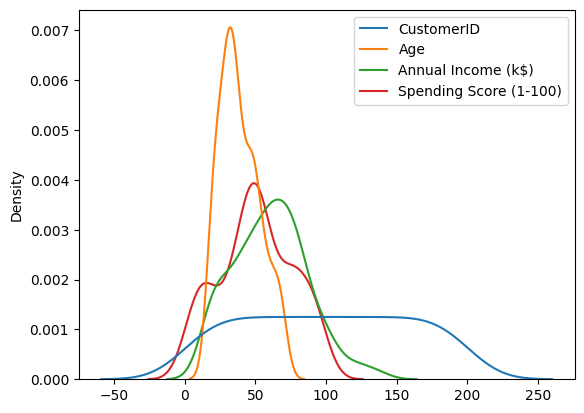

In [47]:
sns.kdeplot(df)

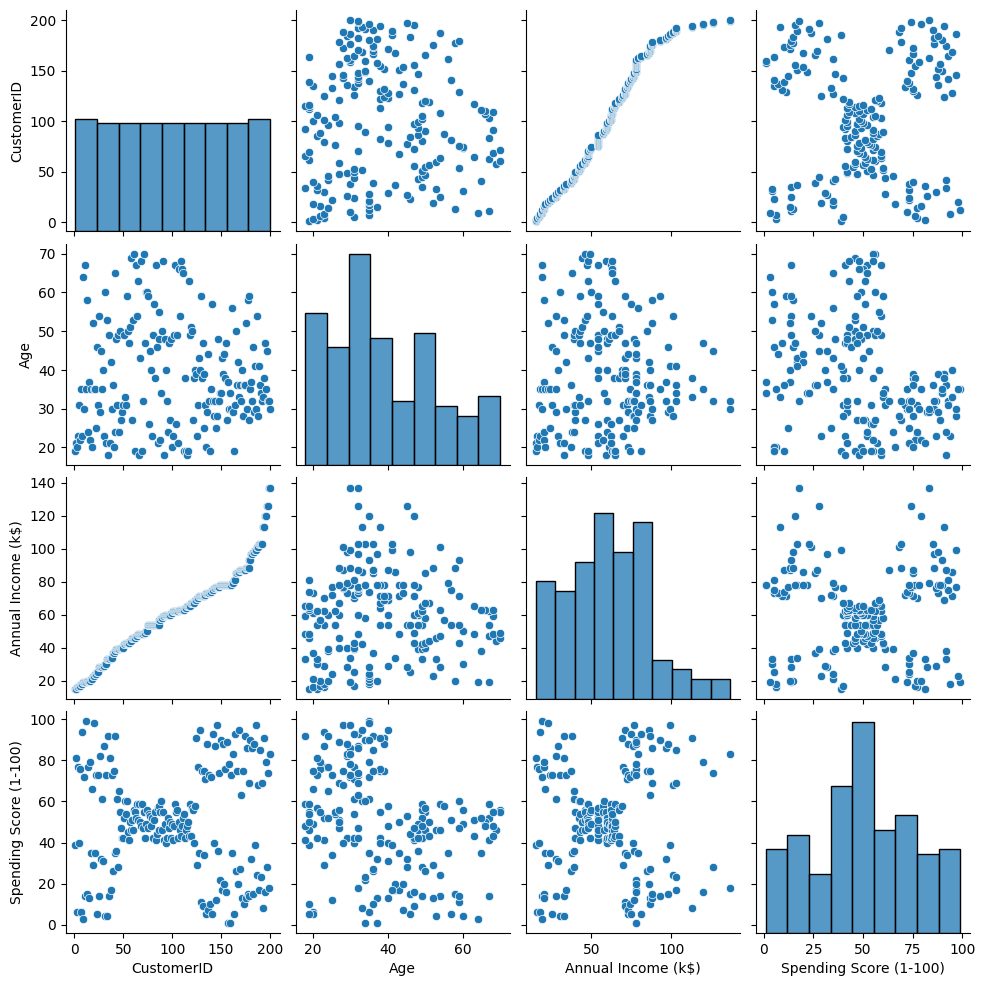

In [48]:
sns.pairplot(df)

<Axes: ylabel='Count'>

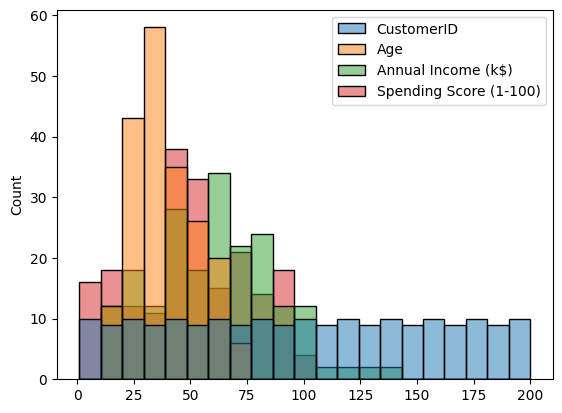

In [49]:
sns.histplot(df)

<Axes: >

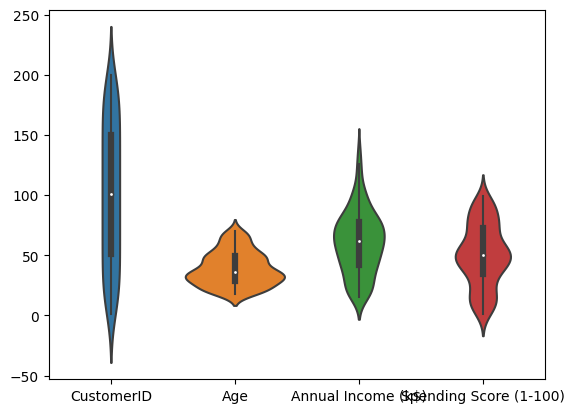

In [50]:
sns.violinplot(df)

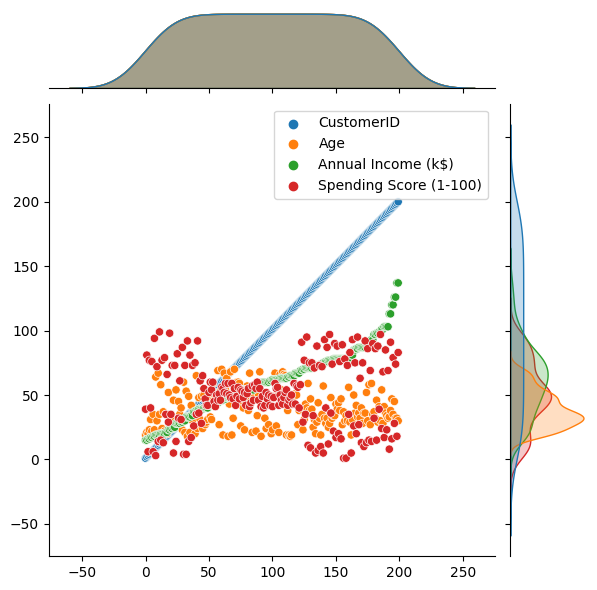

In [51]:
sns.jointplot(df)

<Axes: >

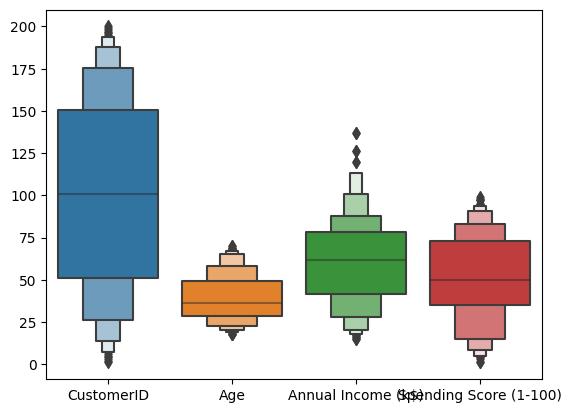

In [52]:
sns.boxenplot(df)

In [53]:
x=df.loc[:,["Spending Score (1-100)","Annual Income (k$)"]].values

In [54]:
x_df=pd.DataFrame(x)

Text(0.5, 1.0, 'Elbow')

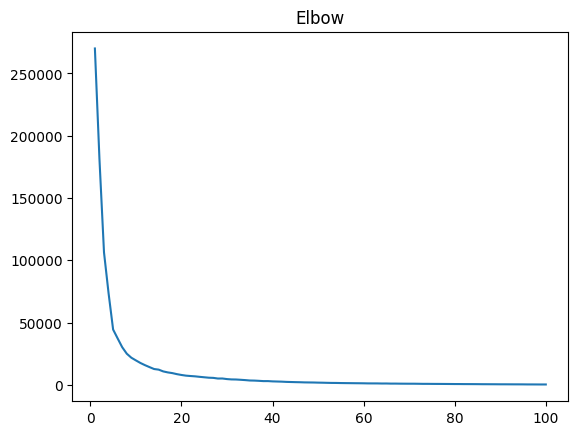

In [55]:
wcss=[]
for i in range(1,101):
  KMeans(n_clusters=i,init="k-means++",max_iter=200,n_init=100,random_state=32).fit(x)
  wcss.append(KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=32).fit(x).inertia_)

plt.plot(range(1,101),wcss)
plt.title("Elbow")

Text(0.5, 1.0, 'Dendrogam')

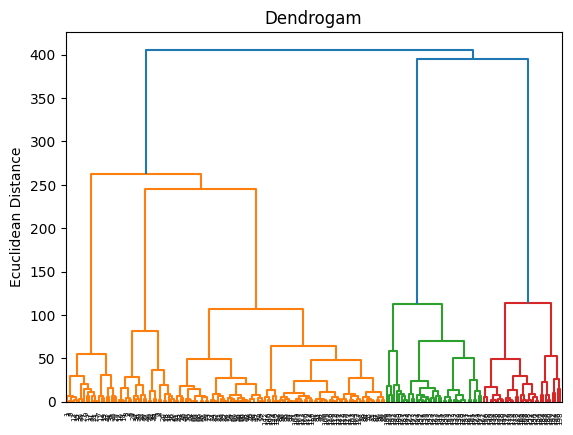

In [56]:
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.ylabel('Ecuclidean Distance')
plt.title('Dendrogam')

Text(0.5, 1.0, 'KMeans Clustering(Annual Income and Spending Score)')

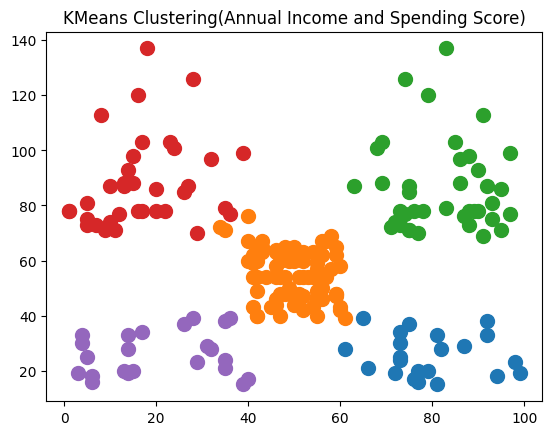

In [57]:
km = KMeans(n_clusters = 5,init="k-means++",max_iter=200,n_init=100,random_state=32)
y_km = km.fit_predict(x)

plt.scatter(x[y_km == 0, 0], x[y_km == 0, 1], s = 100)
plt.scatter(x[y_km == 1, 0], x[y_km == 1, 1], s = 100)
plt.scatter(x[y_km == 2, 0], x[y_km == 2, 1], s = 100)
plt.scatter(x[y_km == 3, 0], x[y_km == 3, 1], s = 100)
plt.scatter(x[y_km == 4, 0], x[y_km == 4, 1], s = 100)

plt.title('KMeans Clustering(Annual Income and Spending Score)')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Text(0.5, 1.0, 'Hierarchial Clustering(Annual Income and Spending Score)')

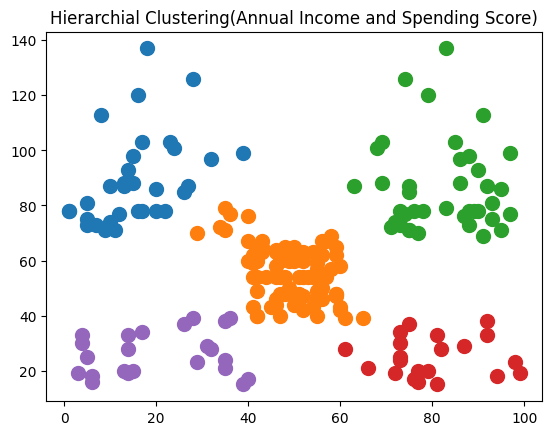

In [58]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100)
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100)
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100)
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100)
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100)


plt.title('Hierarchial Clustering(Annual Income and Spending Score)')
